In This notebook, I will be performing basic analysis on the players_20 Fifa dataset. Some questions related to the players wages, hieghts, and nationalities will be answered and analyzed.

In [21]:
#loading the required libraries
import pandas as pd # required for data manipulation
import numpy as np # required for working with arrays
import matplotlib.pyplot as plt # required for data visualization
import seaborn as sns # built on top of matplot lib ad also required for data visualization

In [25]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path = "/content/drive/MyDrive/Datasets/players_20.csv"
fifa_df = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

Mounted at /content/drive


In [ ]:
# another method to import the dataset
  # from google.colab import files
  # uploaded = files.upload()
  # import io
  # fifa_df = pd.read_csv(io.BytesIO(uploaded['players_20.csv']))
  # Dataset is now stored in a Pandas Dataframe

In [26]:
# print the first 5 rows found in the players_20.csv
fifa_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [27]:
# print all the columns names
for col in fifa_df.columns:
  print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [28]:
# see how many rows and columns are found in this dataframe
fifa_df.shape
# there are 18278 rows (records) and 104 columns

(18278, 104)

In [80]:
# the vlaue counts method gives us the frequency count of the different categories which are present in the dataframe
# these frequencies will be listed in a sorted manner
fifa_df['nationality'].value_counts()

# We can see that most of the players are from England

England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
             ... 
Mauritius       1
Macau           1
Bahrain         1
Vietnam         1
Malawi          1
Name: nationality, Length: 162, dtype: int64

In [33]:
# To view the top 10 countries where most of the players belong to
fifa_df['nationality'].value_counts()[0:10]

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

In [34]:
# Likewise, to view the top 5 countries where most of the players belong to
fifa_df['nationality'].value_counts()[0:5]

England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: nationality, dtype: int64

In [37]:
# just view the top 5 countries names w/o listing the frequency count 
fifa_df['nationality'].value_counts()[0:5].keys()

Index(['England', 'Germany', 'Spain', 'France', 'Argentina'], dtype='object')

<function matplotlib.pyplot.show>

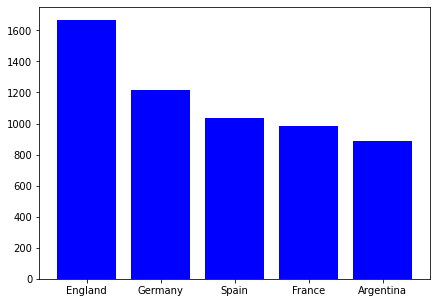

In [61]:
# Make a bar plot for these 5 coutries where most of the players come from
plt.figure(figsize=(7,5))
plt.bar(fifa_df['nationality'].value_counts()[0:5].keys(),fifa_df['nationality'].value_counts()[0:5],color='b')
# or 
# plt.bar(list(fifa_df['nationality'].value_counts()[0:5].keys()),list(fifa_df['nationality'].value_counts()[0:5]),color='b')
plt.show

In [54]:
# Let's see what are the salaries of some of those player
# In order to do so:
# from the entire fifa dataframe we want to extract only two columns (i.e. short_name "short name of the player" , wage_eur "his wage in euro")

player_salary = fifa_df[['short_name','wage_eur']]

# view the first five entries

player_salary.head()

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


In [60]:
# Let's see who is the highest paid football players by sorting them with respect to the wage column

player_salary = player_salary.sort_values(by=['wage_eur'],ascending=False)

# view the highest 5 paid players

player_salary.head()

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
22,A. Griezmann,370000
5,K. De Bruyne,370000


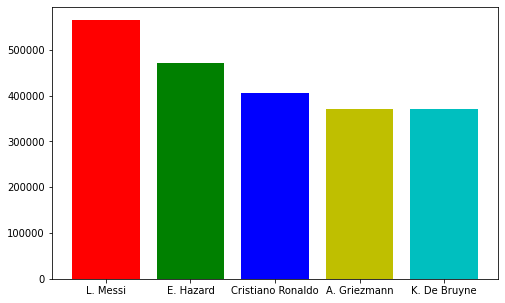

In [92]:
# Make a figure and size it
plt.figure(figsize=(8,5))

# set the x-axis and the y-axis of the bar chart
plt.bar(player_salary['short_name'][0:5],player_salary['wage_eur'][0:5],color=['r','g','b','y','c']) 
# or
# plt.bar(list(player_salary['short_name'])[0:5],list(player_salary['wage_eur'])[0:5],color='b')

# show it
plt.show()

In [91]:
fifa_df['nationality']=='Egypt'

0        False
1        False
2        False
3        False
4        False
         ...  
18273    False
18274    False
18275    False
18276    False
18277    False
Name: nationality, Length: 18278, dtype: bool

In [109]:
# In or to have a list of the Egyptain players sorted according to their salaries

# 1)
Egypt = fifa_df[fifa_df['nationality']=='Egypt']

# Now we have a dataframe which contains all the Egyptain players

# 2)
Egypt = Egypt[['short_name','wage_eur']]

# Now we have filtered this dataframe to contain only two columns (i.e. 'short_name' and 'wage_eur')

# 3)
Egypt = Egypt.sort_values(by=['wage_eur'],ascending=False)

# This line sorts these players based on their wages

Egypt.head()

# show the highest 5 paid Egyptain players

,short_name,wage_eur
9,M. Salah,240000
1126,M. Elneny,65000
1104,Trezeguet,52000
1862,A. Hegazi,38000
5406,A. Elmohamady,25000


In [105]:
# see who are the 7 tallest Egyptain players (do what was in the previous cell but in one line instead)

fifa_df[fifa_df['nationality']=='Egypt'][['short_name','height_cm']].sort_values(by=['height_cm'],ascending=False).head(7)

# fifa_df[fifa_df['nationality']=='Egypt']  --> filter by Egyptian nationality 
# [['short_name','height_cm']] --> only show the the columns 'short_name' and 'height_cm'
# .sort_values(by=['height_cm'],ascending=False) --> sort based on the height
# .head(7) --> show the first 7 rows

,short_name,height_cm
1862,A. Hegazi,194
2846,A. Hassan,191
3564,A. Tarek,191
9472,M. El-Shenawy,191
2929,A. El-Shenawy,189
6052,A. Ghazal,189
4388,M. Alaa,189


In [115]:
# sort liverpool players based on their heights

Liverpool = fifa_df[fifa_df['club']=='Liverpool']

Liverpool = Liverpool[['short_name','height_cm']]

Liverpool.sort_values(by=['height_cm'],ascending=False)

# show the tallest 10 players
Liverpool.head(10)

,short_name,height_cm
7,V. van Dijk,193
9,M. Salah,175
13,Alisson,191
39,S. Mané,175
63,Roberto Firmino,181
81,Fabinho,188
82,A. Robertson,178
139,G. Wijnaldum,175
160,T. Alexander-Arnold,180
218,J. Henderson,182


In [118]:
real_madrid = fifa_df[fifa_df['club']=='Real Madrid']
real_madrid['nationality'].value_counts()

Spain                 13
Brazil                 6
France                 3
Belgium                2
Wales                  1
Germany                1
Japan                  1
Serbia                 1
Uruguay                1
Croatia                1
Dominican Republic     1
Costa Rica             1
Colombia               1
Name: nationality, dtype: int64